In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
cOrange = "#CF5F06"
cBlue = "#76ADD7"

In [3]:
"""
d = pd.read_csv('/tmp/xy', sep='\t', header=None)
d.columns = ['x','y']
x = np.array(d['x']).reshape(d.shape[0],1)
y = np.array(d['y']).reshape(d.shape[0],1)


"""

In [12]:
m = 20
f = lambda x : -10*x + 3 + 50*np.random.normal(0,1,1)
x = np.random.normal(0, 10, m)
y = np.array([f(i) for i in x])
x = x.reshape((m,1))
y = y.reshape((m,1))

lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
mse = np.mean((lm.predict(x) - y)**2)**0.5
l2_err = np.linalg.norm(lm.predict(x) - y)*100/np.linalg.norm(y)
print mse,l2_err

47.691021433 42.2275980671


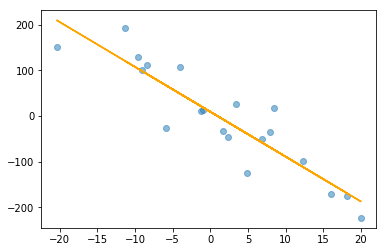

In [17]:
plt.scatter(x, y, alpha = 0.5)
plt.plot(x, lm.predict(x), color = "orange")
plt.show()

In [34]:
def mse(pred_y, y):
    return np.mean((pred_y - y)**2)**0.5

def sampled_reg(x, y, r, sampling):
    if sampling.lower() == 'importance':
        idx = np.random.randint(len(x), size = r)
    else:
        idx = np.random.randint(len(x), size = r)
    
    x_ = x[idx]
    y_ = y[idx]
    lm = LinearRegression()
    lm.fit(x_, y_)
    mserr = mse(lm.predict(x), y)
    return lm

In [107]:
r = 5
for i in range(10):
    lm_ = sampled_reg(x, y, r, 'uniform')
    print mse(lm_.predict(x), y)



63.8284510873
54.9690050955
50.8146320263
47.7888687671
51.4592225187
48.3879704824
54.7891451304
48.515875281
64.0127425865
56.6017725569


In [95]:
r = 5
idx = np.random.randint(len(x), size = r)
x_ = x[idx]
y_ = y[idx]
lm = LinearRegression()
lm.fit(x_, y_)
best_lm = lm
best_mse = mse(best_lm.predict(x), y)
for i in range(10):
    e = mse(y, lm.predict(x))
    #if (best_mse - e) < 10e-1:
    #    continue
    print e
    best_lm = lm
    best_mse = e
    probs = (y - lm.predict(x))**2
    probs = probs/sum(probs)
    probs = probs.reshape(len(probs))
    idx = np.random.choice(range(len(x)), size = r, p = probs)
    x_ = x[idx]
    y_ = y[idx]
    lm = LinearRegression()
    lm.fit(x_, y_)
    #plt.scatter(x_, y_)


74.1161380722
66.1691349572
123.097135791
68.0988214999
77.6032600415
60.8530524992
62.230031051
87.0271909078
65.0751658707
102.832384593
